In [1]:
## source_reference: https://github.com/theremintourette/quickhull
###################################

from math import atan2



class Quick_hull:

	# Get points in convex hull
	def get_convex_hull(self, points):
		if len(points) < 3:
			return []
			
		result = []

		extremes = self.__get_endings(points)

		# Begin recursivity for each side
		self.__add_farthest(points, extremes['left'], extremes['right'], 1, result)
		self.__add_farthest(points, extremes['left'], extremes['right'], -1, result)

		return self.__sort_by_angle(result, extremes['left'])


	# Recursive function looking for farthest point in a group from two given points
	def __add_farthest(self, points, p1, p2, side, result):
		farthest = None
		max_area2 = 0

		# Check if any point is farther than p1, p2
		for p in points:
			if self.__get_side(p1, p2, p) == side:
				area2 = abs(self.__area2(p1, p2, p))
				if area2 > max_area2:
					farthest = p
					max_area2 = area2

		# If there is no farther point, stop recursivity and add p1 and p2 to the convex
		# hull  list if they aren't already in it
		if farthest == None:
			self.__add_extremes(p1, p2, result)
			return

		# If there is, new recursivity calls checking for new farthest points on each side
		self.__add_farthest(points, farthest, p1, - self.__get_side(farthest, p1, p2), result)
		self.__add_farthest(points, farthest, p2, - self.__get_side(farthest, p2, p1), result)


	# Get most left and most right points
	def __get_endings(self, points):
		left = points[0]
		right = points[0]
		for p in points[1:]:
			if p.x < left.x:
				left = p
			if p.x > right.x:
				right = p
		return { 'left': left, 'right': right }


	# Add candidates to the output list if they are not already in it
	def __add_extremes(self, p1, p2, points):
		if p1 not in points:
			points.append(p1)
		if p2 not in points:
			points.append(p2)


	# Return 1 if p is above p1 and p2, 0 if it's collinear and -1 if it's below 
	def __get_side(self, p1, p2, p):
		val = self.__area2(p1, p2, p)
		return val and 1 - 2 * (val < 0)


	# Calculate double of the area between p1, p2 and p 
	def __area2(self, p1, p2, p):
		return (p.y - p1.y) * (p2.x - p1.x) - \
			(p2.y - p1.y) * (p.x - p1.x)


	# Sort a group of points by the angle between each one and a given point
	def __sort_by_angle(self, points, init_point):
		points.remove(init_point)
		angles = list(map(lambda p: atan2(p.y - init_point.y, p.x - init_point.x), points))
		return [init_point] + [p for _, p in sorted(zip(angles, points))]

In [2]:
class Point_structure:
	def __init__(self,x_init,y_init):
		self.x = x_init
		self.y = y_init

	def __repr__(self):
		return "".join(["Point(", str(self.x), ",", str(self.y), ")"])


class Polygon_structure:
	def __init__(self, points=None):
		if points == None:
			points = []
		self.points = points

	def add_point(self, point):
		self.points.append(point)

	def __repr__(self):
		return ''.join(['Polygon(', str([str(p) + ' ' for p in self.points]), ')'])


In [3]:
class Point(Point_structure):
	def __init__(self, x_init, y_init):
		Point_structure.__init__(self, x_init, y_init)


class Polygon(Polygon_structure):
	def __init__(self, points=None):
		Polygon_structure.__init__(self, points=None)

	@property
	def convex_hull(self):
		return Quick_hull().get_convex_hull(self.points)

Runtime of the program is 0.58636474609375


(-49.95, 1048.95, -49.95, 1048.95)

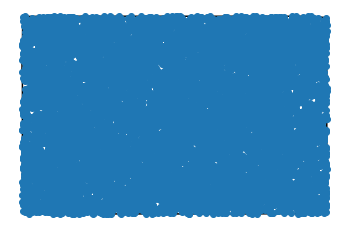

In [4]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import time

start = time.time()
# By default we build a random set of N points with coordinates in [0,300)x[0,300):
N=10001

qh=Quick_hull()
point_list = []
for i in range(N):
  point_list.append(Point(np.random.randint(0,1000),np.random.randint(0,1000)))
L_list=qh.get_convex_hull(point_list)

end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

P = np.array([(p1.x,p1.y) for p1 in point_list])
L = np.array([(p2.x,p2.y) for p2 in L_list])


# Plot the computed Convex Hull:
plt.figure()
plt.plot(L[:,0],L[:,1], 'k-') #, linewidth=2, markersize=5
plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'k-')
plt.plot(P[:,0],P[:,1],"o")
plt.axis('off')
#plt.show()


Runtime of the program is 5.295255422592163


(-1.2632305443286895,
 1.271972519159317,
 -0.02150265006348491,
 0.6231556466780603)

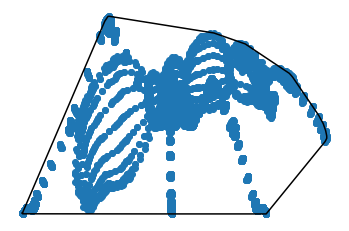

In [5]:
import pandas as pd
##df2 = pd.read_csv('E:\\wrk\\code\\c_c++\\_cyg\\_out_disp\\_csv.file\\02.Formica.csv')  
df2 = pd.read_csv('02.Formica.csv')  #01.BugattiAtlantic,02.Formica,03.Flight,04.T-800-Head,05.Al,_test,dgen1,dgen2 
N,M=df2.shape
#P1=np.zeros(N,M)

    
P1 = [(df2.loc[[i],'x'],df2.loc[[i],'y']) for i in range(N)]
P=np.array(P1, dtype='f')


start = time.time()
# By default we build a random set of N points with coordinates in [0,300)x[0,300):


qh=Quick_hull()
point_list = []
for i in range(N):
  point_list.append(Point(P[i,0],P[i,1]))
L_list=qh.get_convex_hull(point_list)

end = time.time()
# total time taken
print(f"Runtime of the program is {end - start}")

P = np.array([(p1.x,p1.y) for p1 in point_list])
L = np.array([(p2.x,p2.y) for p2 in L_list])


# Plot the computed Convex Hull:
plt.figure()
plt.plot(P[:,0],P[:,1],"o")
plt.plot(L[:,0],L[:,1], 'k-') #, linewidth=2, markersize=5
plt.plot([L[-1,0],L[0,0]],[L[-1,1],L[0,1]], 'k-')

plt.axis('off')
#plt.show()
